## Descriptive Analysis on ECB Data
---------------------

In [24]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import aux_functions 

In [25]:
# read csv file
workingdir = os.getcwd()
# read cleaned_data.csv file
#df = pd.read_csv(workingdir + '/ECB_Data.csv')

df = pd.read_csv(workingdir + '/data_complete.csv')

In [26]:
df

,Date,Media,Member,Link,Information,Questions,Answers
0,23 December 2005,Interview with Der Spiegel,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"SPIEGEL: Monsieur Trichet, any concrete uttera...",The publication of the translation was authori...
1,19 December 2005,Interview with Hospodářské Noviny,Otmar Issing,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,The new EU member states want to adopt the eur...,These questions are all closely related to eac...
2,19 December 2005,Interview with Financial Times and Financial T...,Lucas Papademos,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"Mr Papademos, you have responsibility as ECB V...",A comparison of the risks involved when short-...
3,15 December 2005,Interview with Paris Match,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,Paris Match. After two uneventful years at the...,The publication of the translation was authori...
4,9 December 2005,Interview in Il Giornale,Lorenzo Bini Smaghi,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"However, Europe’s politicians, with few except...","By Angelo Allegri, our correspondent in Frankf..."
...,...,...,...,...,...,...,...
514,31 January 2024,Interview with Die Zeit,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","Mr de Guindos, Germany is in a recession, the ...",31 January 2024[end_answer] There are three re...
515,22 January 2024,Thanks to Wolfgang Schäuble,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Contribution by Christine Lagarde, President o...",Disclaimer,"Frankfurt am Main, 22 January 2024[end_answer]..."
516,13 January 2024,Interview with Corriere della Sera,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...",The rate hike in September was meant to increa...,13 January 2024[end_answer] The first point to...
517,10 January 2024,Q&A on X,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...",Who decided that 2% inflation is good and what...,"10 January 2024[end_answer] Hi all, this is@Is..."


Remove every Na

In [27]:
# removing Nas
df = df.dropna()

Converting the data into desired type (everything columns are encoded as objects)

In [28]:
#types of data
df.dtypes

Date           object
Media          object
Member         object
Link           object
Information    object
Questions      object
Answers        object
dtype: object

In [29]:
import pandas as pd

# Load your data - assuming it's loaded into DataFrame 'df'
# df = pd.read_csv('your_file.csv')  # Uncomment this if you're reading from a CSV file

# rename Date column to date
df.rename(columns={'Date': 'date'}, inplace=True)

# rename Answers column to content
df.rename(columns={'Answers': 'contents'}, inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert all other columns to string type, except 'date'
for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(str)

# Verify the data types
print(df.dtypes)


date           datetime64[ns]
Media                  object
Member                 object
Link                   object
Information            object
Questions              object
contents               object
dtype: object


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/3664216846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 'date'}, inplace=True)
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/3664216846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Answers': 'contents'}, inplace=True)
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/3664216846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## Descriptive Analysis

In [30]:
# describe the data
df.describe()

,date
count,459
mean,2017-09-27 02:24:18.823529472
min,2005-01-20 00:00:00
25%,2015-02-02 12:00:00
50%,2019-02-19 00:00:00
75%,2021-04-10 00:00:00
max,2024-04-23 00:00:00


In [31]:
#ECB Color
color = (17/255, 49/255, 147/255)

1. Word Frequency Analysis


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathieu26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


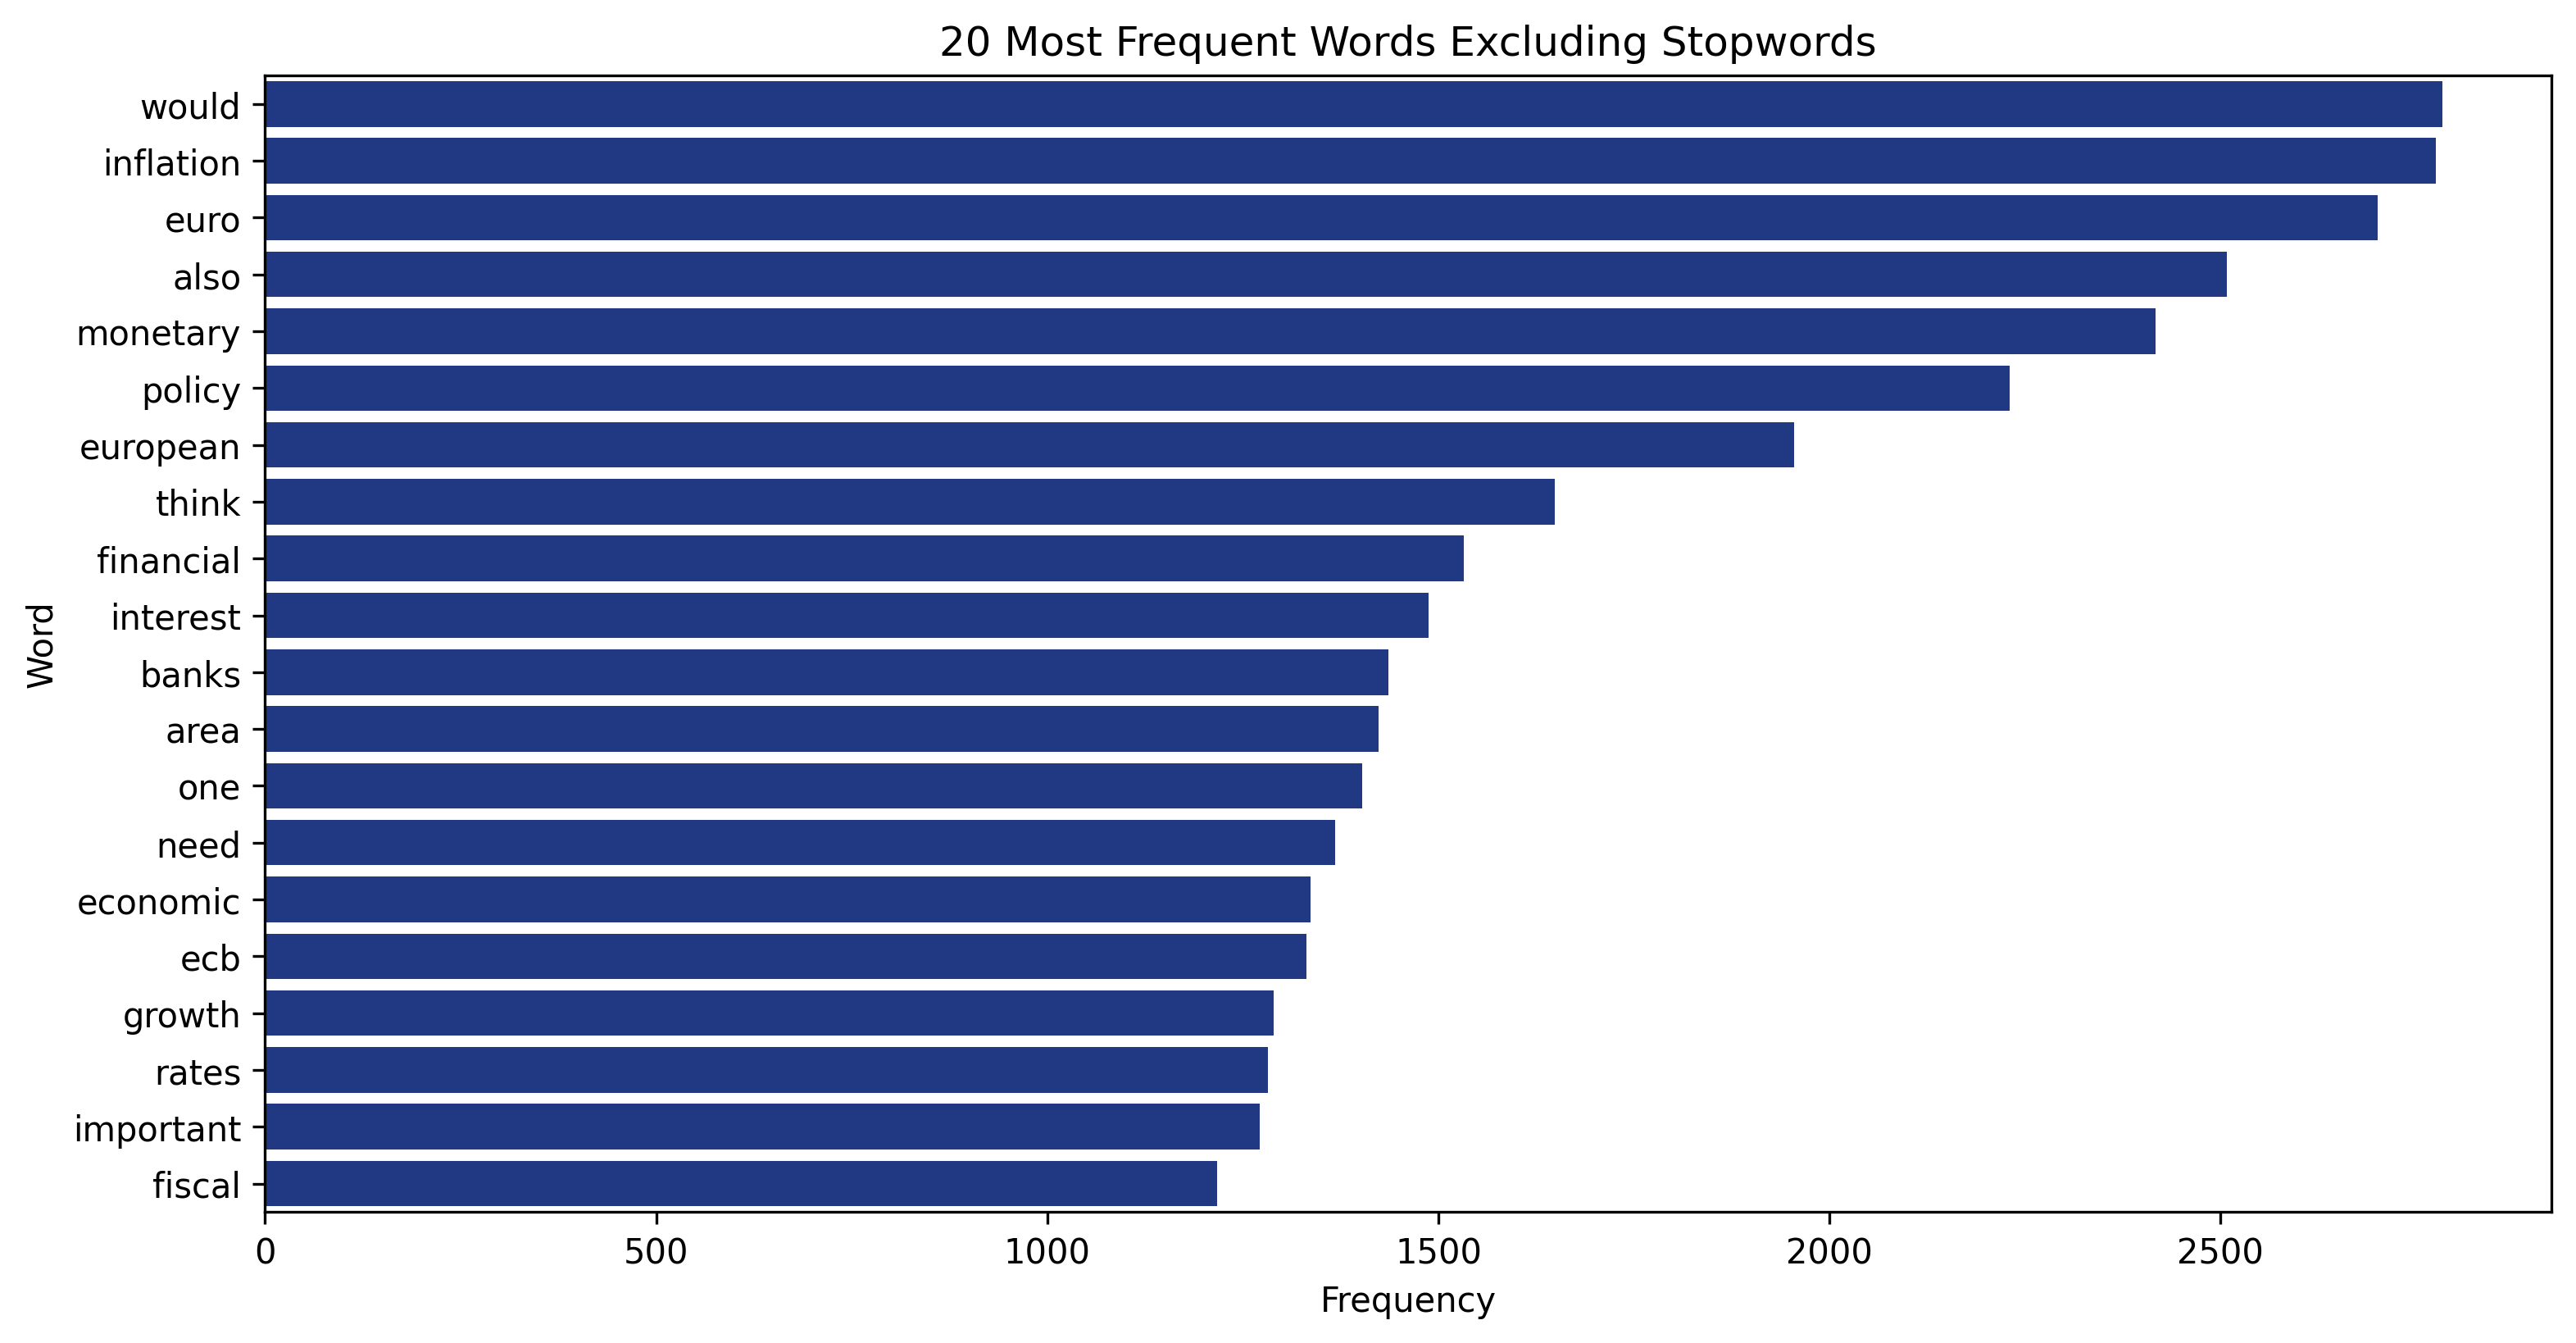

In [32]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that NLTK stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def word_frequency(df):
    # Join all texts in the 'contents' column
    all_text = ' '.join(df['contents'].tolist()).lower()
    words = all_text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    frequency = Counter(filtered_words)
    return frequency.most_common()

# Apply the function
word_freq = word_frequency(df)

# If the result looks correct, proceed to plot
if word_freq:
    # Plots the 20 most frequent words
    plt.figure(figsize=(12, 6), dpi=300)
    df_plot = pd.DataFrame(word_freq, columns=['Word', 'Frequency']).head(20)
    sns.barplot(x='Frequency', y='Word', data=df_plot, color=color)
    plt.title('20 Most Frequent Words Excluding Stopwords')
    plt.show()


2. Sentiment Analysis


In [33]:
from textblob import TextBlob

def sentiment_analysis(df):
    df['sentiment'] = df['contents'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

# Apply the function
df = sentiment_analysis(df)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/3035613002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['contents'].apply(lambda x: TextBlob(x).sentiment.polarity)


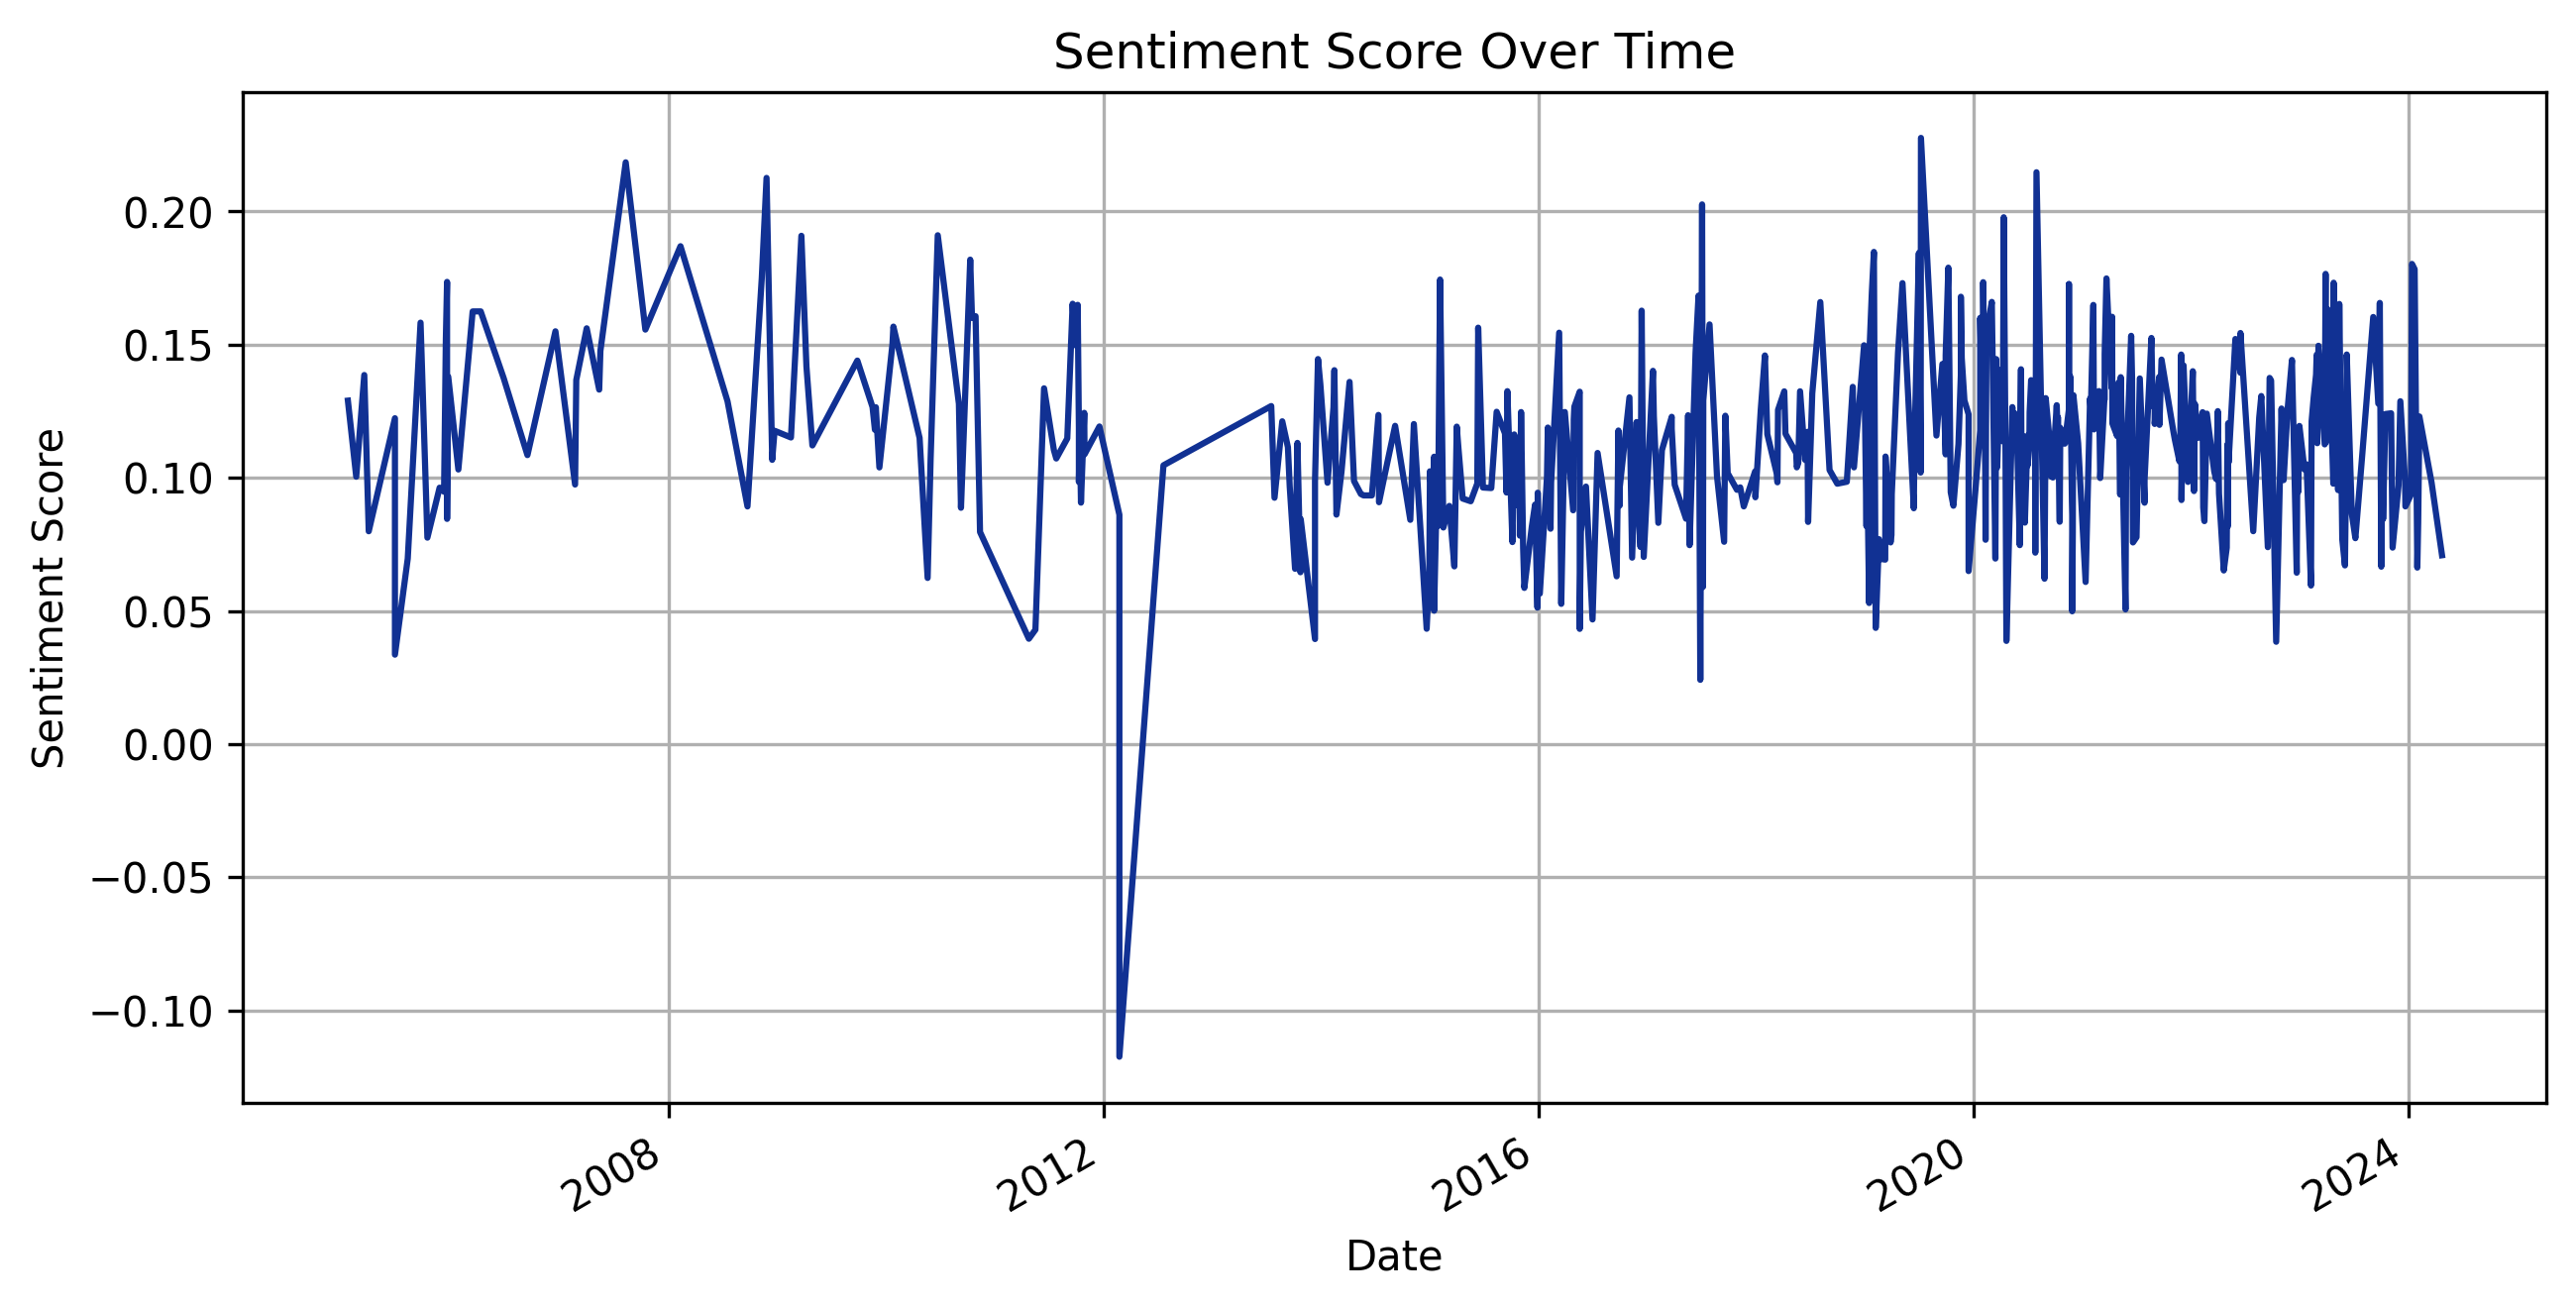

In [34]:
# Plot the sentiment over time
plt.figure(figsize=(10, 5), dpi = 300)
df.sort_values('date').set_index('date')['sentiment'].plot(kind='line', color=color)
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

The sentiment score calculated from the TextBlob library reflects the emotional tone of the content within the contents column of your DataFrame, which includes transcripts of interviews from the ECB on inflation. Here's how to interpret the sentiment score:

Polarity: This is a float within the range [-1.0, 1.0] where -1.0 denotes extreme negativity, 0 denotes neutrality, and 1.0 denotes extreme positivity. The sentiment.polarity attribute returns this polarity score for each text.

2.1. Part-of-speech tagging using TextBlob

In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mathieu26/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
import pandas as pd
from textblob import TextBlob

# Assuming 'df' is your DataFrame and it has a column 'contents' with transcripts

def pos_tagging(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return part of speech tags
    return blob.tags

# Apply the POS tagging function to each row in the 'contents' column
df['pos_tags'] = df['contents'].apply(pos_tagging)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/2442230502.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_tags'] = df['contents'].apply(pos_tagging)


In [37]:
df.head

<bound method NDFrame.head of           date                                              Media  \
0   2005-12-23                         Interview with Der Spiegel   
1   2005-12-19                  Interview with Hospodářské Noviny   
2   2005-12-19  Interview with Financial Times and Financial T...   
3   2005-12-15                         Interview with Paris Match   
4   2005-12-09                           Interview in Il Giornale   
..         ...                                                ...   
513 2024-02-03                       Interview with De Volkskrant   
514 2024-01-31                            Interview with Die Zeit   
515 2024-01-22                        Thanks to Wolfgang Schäuble   
516 2024-01-13                 Interview with Corriere della Sera   
517 2024-01-10                                           Q&A on X   

                  Member                                               Link  \
0    Jean-Claude Trichet  https://www.ecb.europa.eu/press/inte

Using function stored in py file to display contents of the variables

In [38]:
aux_functions.print_contents(df,20, "pos_tags")

Content 1: [('The', 'DT'), ('publication', 'NN'), ('of', 'IN'), ('the', 'DT'), ('translation', 'NN'), ('was', 'VBD'), ('authorised', 'VBN'), ('by', 'IN'), ('Der', 'NNP'), ('Spiegel', 'NNP'), ('[', 'NN'), ('end_answer', 'NN'), (']', 'NNP'), ('Trichet', 'NNP'), ('laughs', 'VBZ'), ('Of', 'IN'), ('course', 'NN'), ('the', 'DT'), ('“', 'JJ'), ('porte-parole', 'JJ'), ('”', 'NN'), ('of', 'IN'), ('the', 'DT'), ('ECB', 'NNP'), ('as', 'RB'), ('well', 'RB'), ('as', 'IN'), ('all', 'DT'), ('members', 'NNS'), ('of', 'IN'), ('our', 'PRP$'), ('decision-making', 'JJ'), ('bodies', 'NNS'), ('must', 'MD'), ('be', 'VB'), ('aware', 'JJ'), ('that', 'IN'), ('their', 'PRP$'), ('statements', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('hugely', 'RB'), ('significant', 'JJ'), ('for', 'IN'), ('large', 'JJ'), ('numbers', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('The', 'DT'), ('euro', 'JJ'), ('area', 'NN'), ('has', 'VBZ'), ('311', 'CD'), ('million', 'CD'), ('citizens', 'NNS'), ('after', 'IN'), ('all', 'DT'), ('And', 'CC')

KeyError: 14

+ NN: Noun, singular or mass (e.g., cat, tree)
+ NNS: Noun, plural (e.g., cats, trees)
+ NNP: Proper noun, singular (e.g., John, London)
+ NNPS: Proper noun, plural (e.g., Americans, Carolinas)
+ PRP: Personal pronoun (e.g., I, he, she)
+ PRP$: Possessive pronoun (e.g., my, his, her)
+ RB: Adverb (e.g., very, quickly, often)
+ RBR: Adverb, comparative (e.g., better, faster)
+ RBS: Adverb, superlative (e.g., best, fastest)
+ VB: Verb, base form (e.g., take, live)
+ VBD: Verb, past tense (e.g., took, lived)
+ VBG: Verb, gerund or present participle (e.g., taking, living)
+ VBN: Verb, past participle (e.g., taken, lived)
+ VBP: Verb, non-3rd person singular present (e.g., take, live)
+ VBZ: Verb, 3rd person singular present (e.g., takes, lives)
+ JJ: Adjective (e.g., big, happy)
+ JJR: Adjective, comparative (e.g., bigger, happier)
+ JJS: Adjective, superlative (e.g., biggest, happiest)
+ DT: Determiner (e.g., the, a, some)
+ IN: Preposition or subordinating conjunction (e.g., in, under, although)
+ CC: Coordinating conjunction (e.g., and, but, or)
+ MD: Modal (e.g., can, will, must)
+ WP: Wh-pronoun (e.g., who, what)
+ WDT: Wh-determiner (e.g., which, whatever)
+ WRB: Wh-adverb (e.g., where, when)

Frequency Analysis of POS Tags

In [39]:
def count_pos_tags(df):
    # Initialize a Counter to accumulate tag counts
    tag_counts = Counter()

    # Iterate over each row's pos_tags to count each tag
    for index, row in df.iterrows():
        tags = [tag for word, tag in row['pos_tags']]
        tag_counts.update(tags)

    return tag_counts

# Count tags for the entire DataFrame
overall_tag_counts = count_pos_tags(df)
print("Overall POS Tag Counts:", overall_tag_counts)


Overall POS Tag Counts: Counter({'NN': 141003, 'IN': 98464, 'DT': 86490, 'JJ': 72321, 'NNS': 46059, 'RB': 43760, 'PRP': 37176, 'VB': 34474, 'NNP': 32881, 'VBP': 29067, 'VBZ': 28795, 'CC': 25562, 'TO': 23101, 'VBN': 16695, 'MD': 14557, 'VBG': 13787, 'VBD': 11564, 'CD': 8411, 'PRP$': 8408, 'WDT': 6114, 'JJR': 4233, 'WRB': 3977, 'EX': 3509, 'WP': 2848, 'RBR': 2352, 'RP': 1659, 'JJS': 1035, 'NNPS': 702, 'PDT': 686, 'RBS': 454, 'UH': 171, 'FW': 169, 'POS': 160, 'WP$': 32, 'LS': 3, 'SYM': 3})


2.2. Noun phrase extraction using Textblob

In [40]:
#!pip install textblob
#!python -m textblob.download_corpora  # This downloads the necessary corpora for features like noun phrase extraction.

In [ ]:
def extract_noun_phrases(text):
    blob = TextBlob(text)
    return blob.noun_phrases


In [ ]:
# Apply the noun phrase extraction function to each row in the 'contents' column
df['noun_phrases'] = df['contents'].apply(extract_noun_phrases)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/3542713608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noun_phrases'] = df['contents'].apply(extract_noun_phrases)


In [ ]:
aux_functions.print_contents(df,20, "noun_phrases")

Content 1: ['central banks', 'inflation trajectory', 'monetary policy action', 'monetary', 'monetary policy transmission everywhere', 'sharp deceleration', 'weak construction activity', 'inflation expectations', 'inflation shock', 'monetary policy action', 'inflation reflects', 'supply-side shocks', 'monetary policy', 'consumer prices', 'doesn ’ t', 'monetary policy act', 'ecb', 'september', 'doesn ’ t', 'full impact', 'rate rises', 'policy transmission', 'supply-side shocks', 'october', 'critical phase', 'monetary policy', 'final part', 'hardest part', 'disinflationary process', 'sharp decline', 'real wages', 'strong growth', 'nominal wages', 'services sector', 'dominant role', 'cost structure', 'broad scale', 'productive workers', 'public sector employment', 'strong rise', 'nominal wages', 'high growth', 'unit labour costs', 'does', 'crucial question', 'will', 'unit labour costs', 'consumer prices', 'monetary policy', 'aggregate demand', 'monetary policy', 'price expectations', '’ s'

3. Topic Modeling

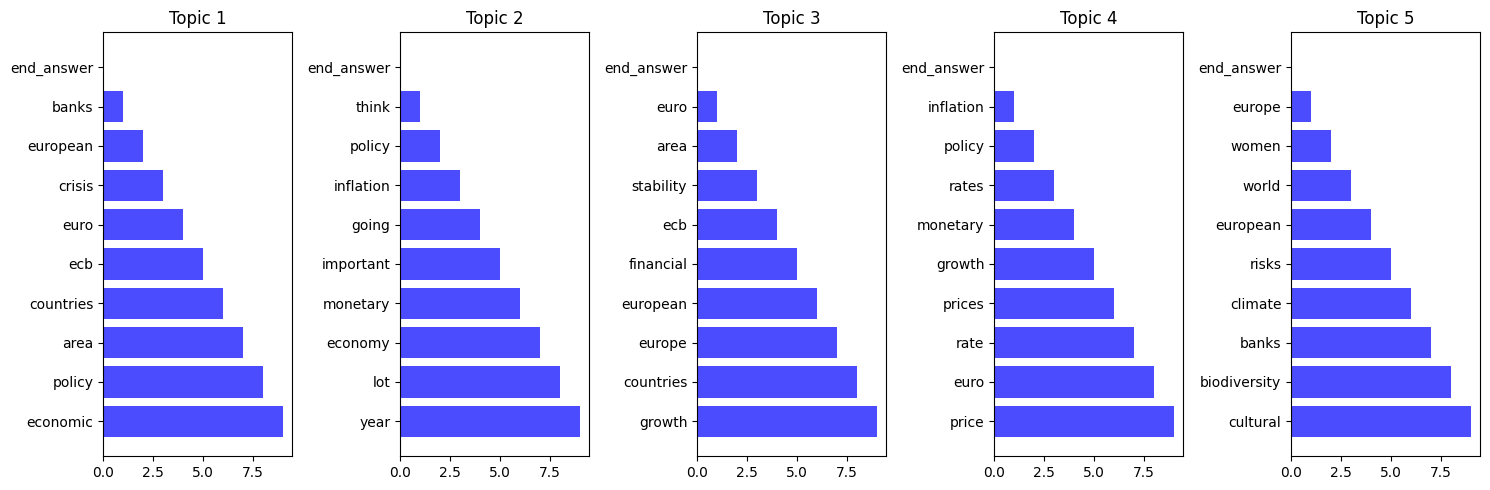

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def topic_modeling(df, n_topics=5, n_words=10):
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(df['contents'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(X)
    feature_names = vec.get_feature_names_out()
    # Getting the top words for each topic
    top_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[:-n_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_words.append(top_features)
    return lda, vec, top_words

# Apply the function
lda_model, vectorizer, top_words = topic_modeling(df)

# Now let's plot the top words per topic
def plot_top_words(top_words, n_topics=5):
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic_words in enumerate(top_words):
        ax = axes[topic_idx]
        ax.barh(topic_words, range(len(topic_words)), color='blue', alpha=0.7)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.set_yticks(range(len(topic_words)))
        ax.set_yticklabels(topic_words)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()

plot_top_words(top_words)


4. Text Length Distribution


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/2573972944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['contents'].apply(len)


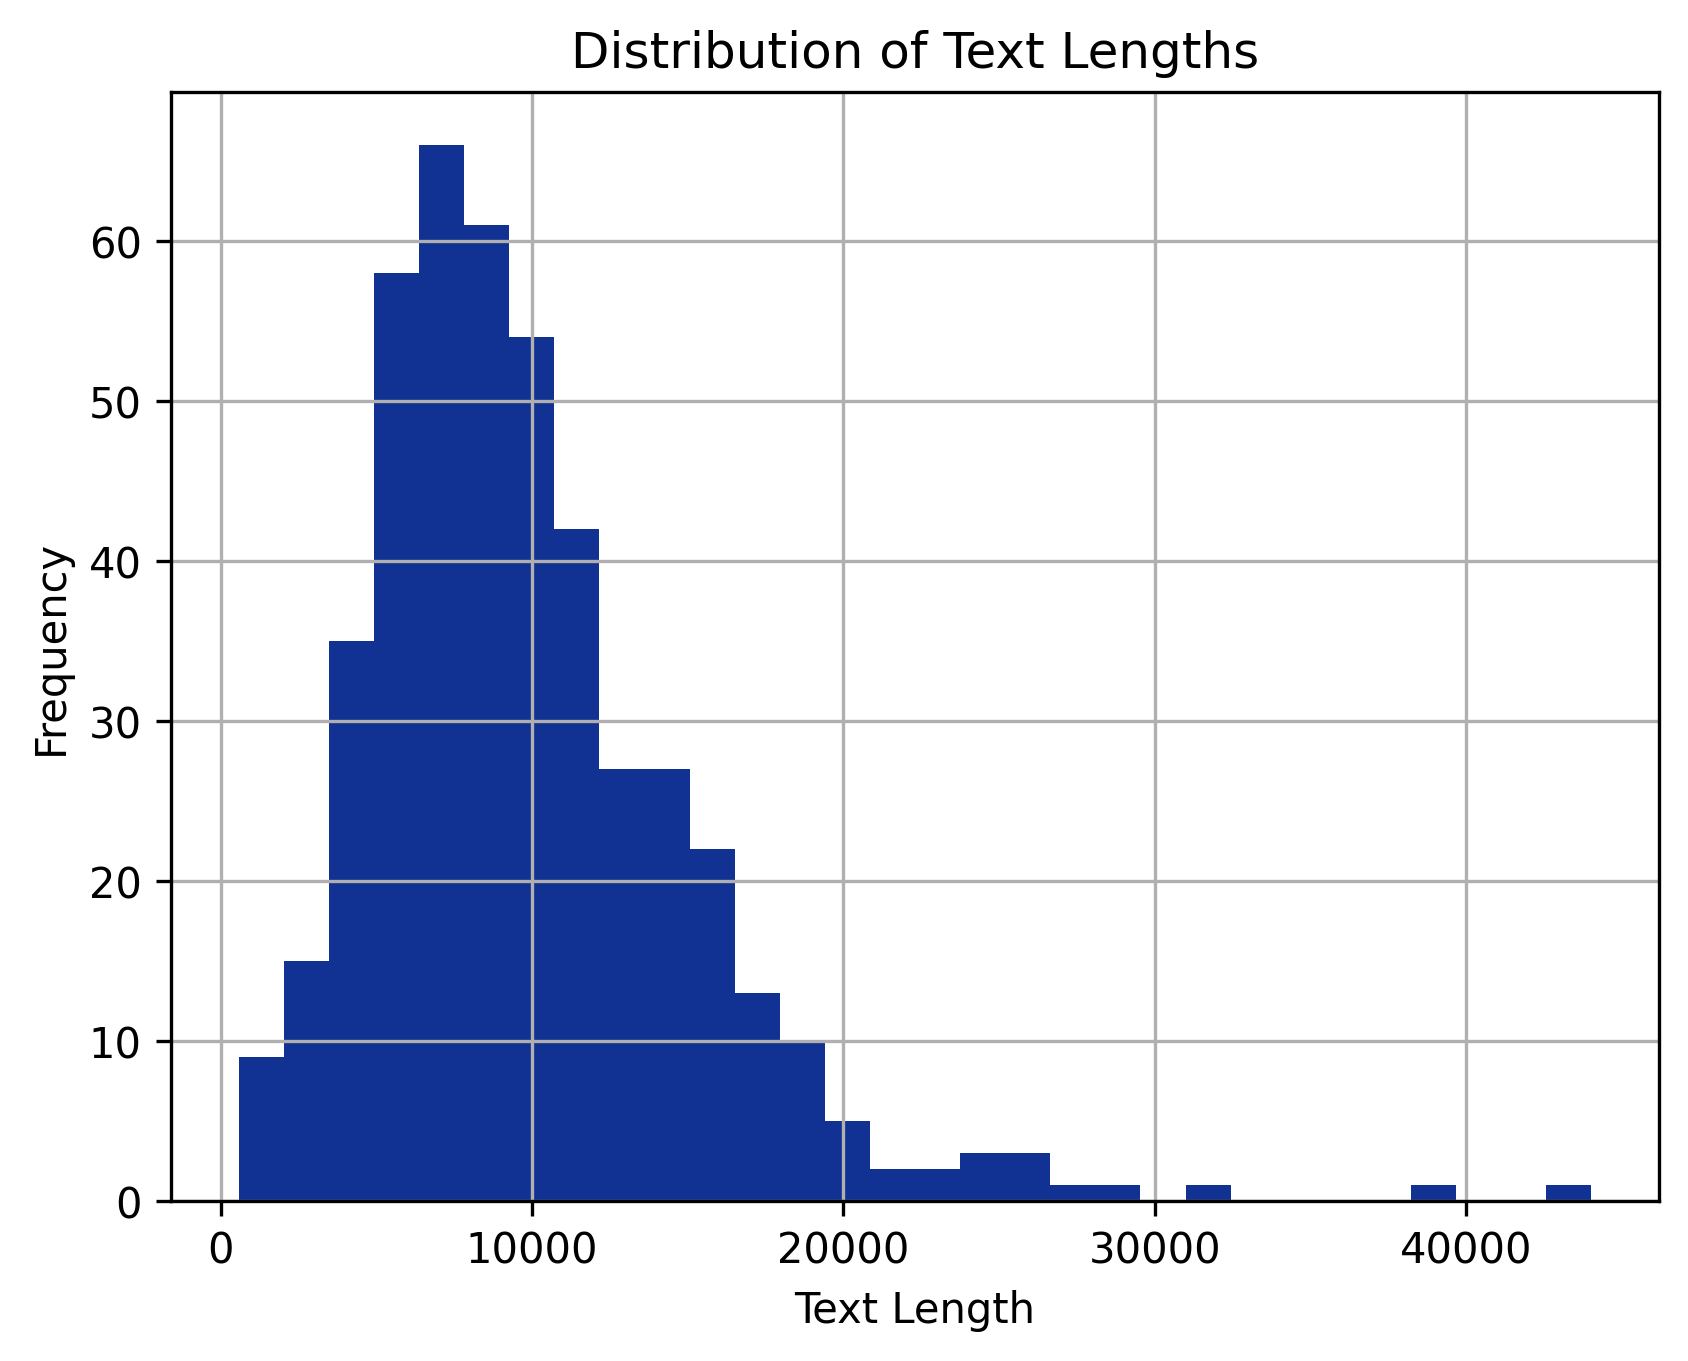

In [42]:
import matplotlib.pyplot as plt

def text_length_distribution(df):
    # Add a new column 'text_length' to the DataFrame based on the length of each entry in 'contents'
    df['text_length'] = df['contents'].apply(len)
    # Create a histogram of the text lengths
    plt.figure(dpi=300)  # Set the dpi for the entire figure
    # Define a color
    # Plot histogram with a label for the legend
    df['text_length'].hist(bins=30, color=color, label='Text Length')
    # Add title and labels
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

# Apply the function with an example DataFrame
# df = pd.DataFrame(...)  # Define or load your DataFrame here before using the function
text_length_distribution(df)


In [43]:
# average text length
df['text_length'].mean()

9888.339869281046

5. Readability Scores


In [44]:
import textstat

In [ ]:
def readability_scores(df):
    df['readability'] = df['contents'].apply(textstat.flesch_reading_ease)
    return df

# Apply the function
df = readability_scores(df)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/3567504131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability'] = df['contents'].apply(textstat.flesch_reading_ease)


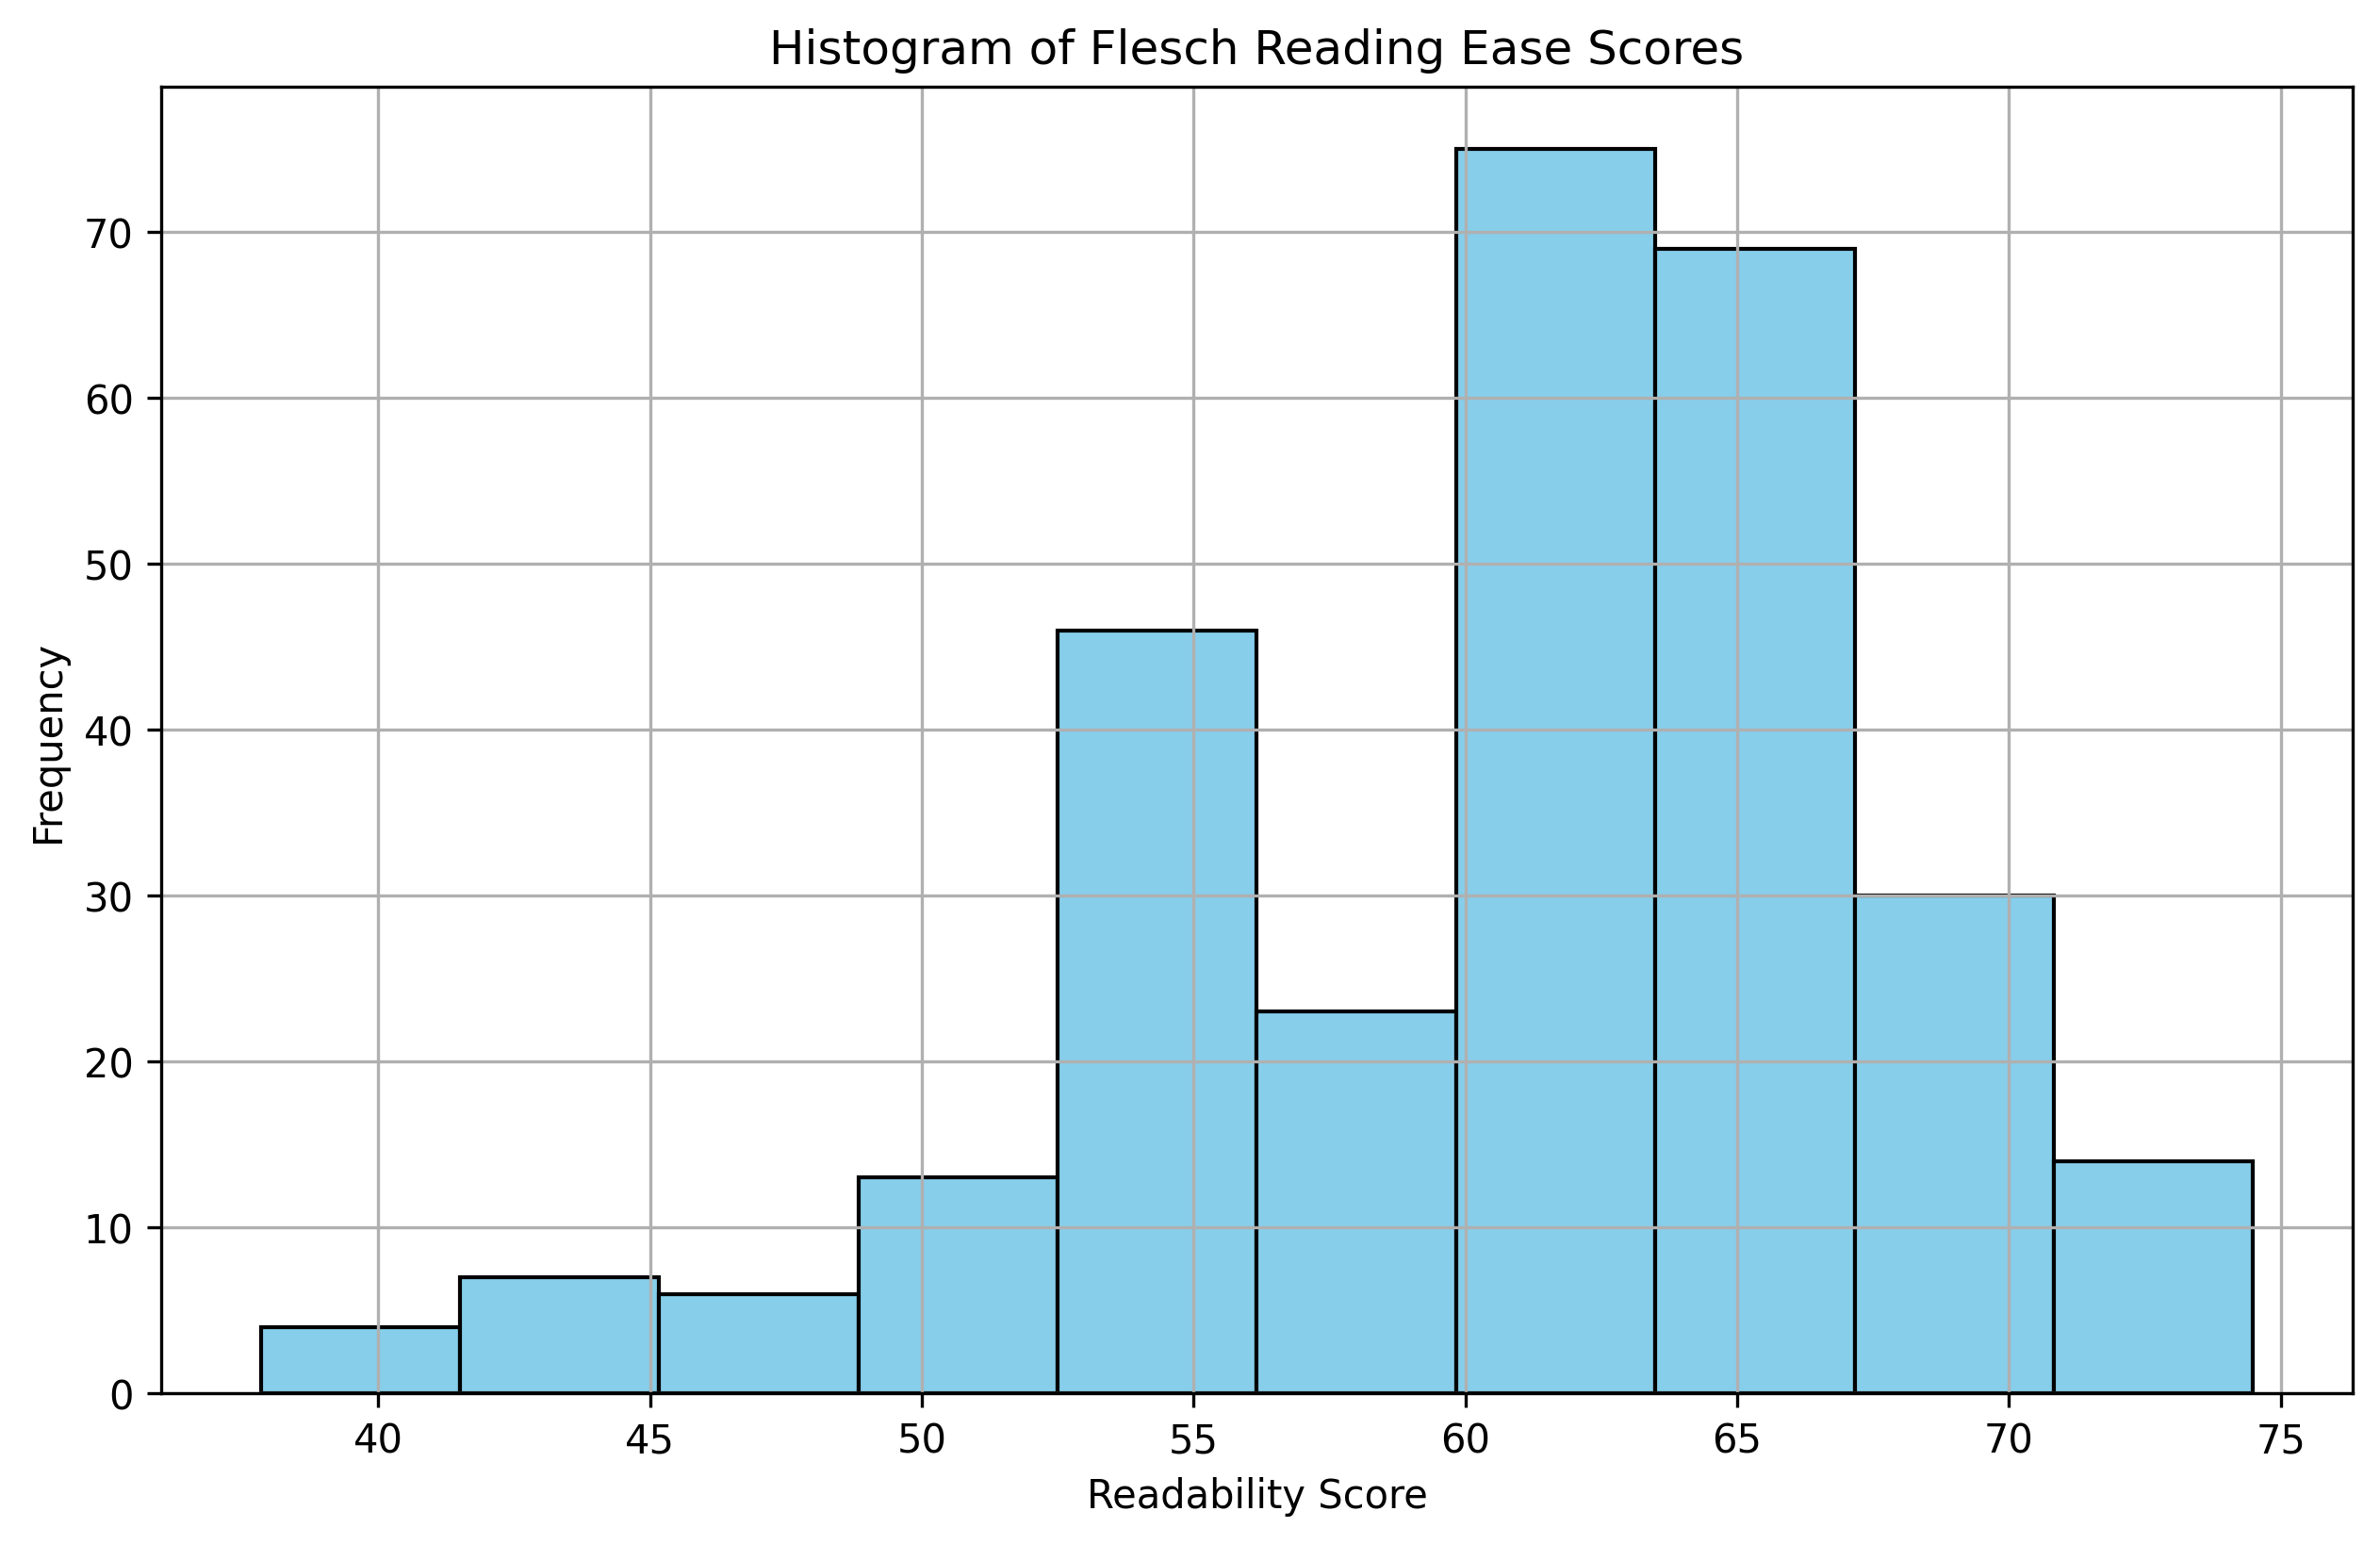

In [ ]:
# Plotting the readability scores
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(df['readability'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Flesch Reading Ease Scores')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interpretation:

The histogram of Flesch Reading Ease Scores you’ve provided shows the distribution of readability scores for your ECB interview transcripts dataset. The Flesch Reading Ease Score is a measure of how easy a text is to read. The scale runs from 0 to 100, with higher scores indicating material that is easier to read. Here’s a general guide for interpreting the scores:

+ 90-100: Very Easy (easily understood by an average 11-year-old student)
+ 80-90: Easy
+ 70-80: Fairly Easy
+ 60-70: Standard (easily understood by 13- to 15-year-old students)
+ 50-60: Fairly Difficult
+ 30-50: Difficult (best understood by university graduates)
+ 0-30: Very Confusing

6. Named Entity Recognition (NER)


In [ ]:
"""import spacy

nlp = spacy.load('en_core_web_sm')

def named_entity_recognition(df):
    df['named_entities'] = df['contents'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
    return df

# Apply the function
df = named_entity_recognition(df)
"""

"import spacy\n\nnlp = spacy.load('en_core_web_sm')\n\ndef named_entity_recognition(df):\n    df['named_entities'] = df['contents'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])\n    return df\n\n# Apply the function\ndf = named_entity_recognition(df)\n"

In [ ]:
"""import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

# Extract all entity labels
all_labels = [label for sublist in df['named_entities'] for _, label in sublist]

# Count frequency of each label
label_freq = Counter(all_labels)

# Data for plotting
labels, freqs = zip(*label_freq.items())

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(labels, freqs, color='teal')
plt.title('Frequency of Named Entity Types')
plt.xlabel('Entity Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
"""

"import pandas as pd\nimport matplotlib.pyplot as plt\nimport spacy\nfrom collections import Counter\n\n# Extract all entity labels\nall_labels = [label for sublist in df['named_entities'] for _, label in sublist]\n\n# Count frequency of each label\nlabel_freq = Counter(all_labels)\n\n# Data for plotting\nlabels, freqs = zip(*label_freq.items())\n\n# Plotting\nplt.figure(figsize=(10, 6), dpi=300)\nplt.bar(labels, freqs, color='teal')\nplt.title('Frequency of Named Entity Types')\nplt.xlabel('Entity Types')\nplt.ylabel('Frequency')\nplt.xticks(rotation=45)\nplt.show()\n"

The bar chart displaying the "Frequency of Named Entity Types" from your ECB interview transcripts provides insights into the kind of entities frequently mentioned in the discussions about inflation. Here's a breakdown of what each of these named entity types usually represents:

+ DATE: Refers to specific dates. The high frequency indicates many discussions about specific times, such as past events, deadlines, forecasts, or timeframes for economic policies.
+ ORDINAL: Represents "first", "second", "third", etc., which could be used to reference sequences or rankings, possibly related to economic indices or position statements.
+ ORG: Short for "organization", which could include banks, financial institutions, governments, and other bodies that are relevant to economic discussions.
+ PERCENT: Clearly essential in discussions of inflation, interest rates, and economic growth, where percentages are commonly used to express rates of change or proportions.
+ QUANTITY: This could refer to amounts of money, quantities in economic forecasts, or other numerical data.
+ CARDINAL: These are numbers that do not fall under another category and could refer to quantities, like fiscal numbers, statistical data, etc.
+ LOC: Short for "location", which could point to the mention of specific places important in the context of economic discussions, such as countries or regions experiencing different inflation rates.
+ GPE: Stands for "Geopolitical Entity", which would include countries, cities, states, etc., suggesting discussions may have involved comparisons of economic conditions across different regions.
+ NORP: Refers to nationalities or religious or political groups. This could indicate discussions around how different population groups are affected by or are responding to inflation.
+ PERSON: Implies that individuals are often referenced, which could be interviewees, economists, politicians, or key figures in finance and economics.
+ LAW: Points to legal or regulatory terms, which might come up in discussions of monetary policy, fiscal regulations, or legal frameworks affecting economic policy.
+ EVENT: Could involve specific events that have economic implications, such as policy announcements, market changes, or economic summits.

7. Co-occurrence of Key Terms


In [ ]:
import pandas as pd
from collections import defaultdict

# Define key terms you are interested in
key_terms = ['inflation', 'policy', 'economy', 'rates', 'ECB']

def co_occurrence_matrix(df, key_terms):
    # Create a dictionary to hold pairs of key terms and their co-occurrence count
    co_occurrence = defaultdict(int)
    
    # Process each document
    for document in df['contents']:
        words = document.lower().split()
        # Find which key terms are in the current document
        terms_in_doc = set(term for term in key_terms if term in words)
        # Increment counts for each pair of terms found in the same document
        for term1 in terms_in_doc:
            for term2 in terms_in_doc:
                if term1 != term2:
                    co_occurrence[(term1, term2)] += 1
    
    # Turn the co_occurrence dictionary into a DataFrame for better readability
    return pd.DataFrame(list(co_occurrence.items()), columns=['Term Pair', 'Co-occurrence'])

# Apply the function
co_occurrence_df = co_occurrence_matrix(df, key_terms)


8. Trend Analysis Over Time


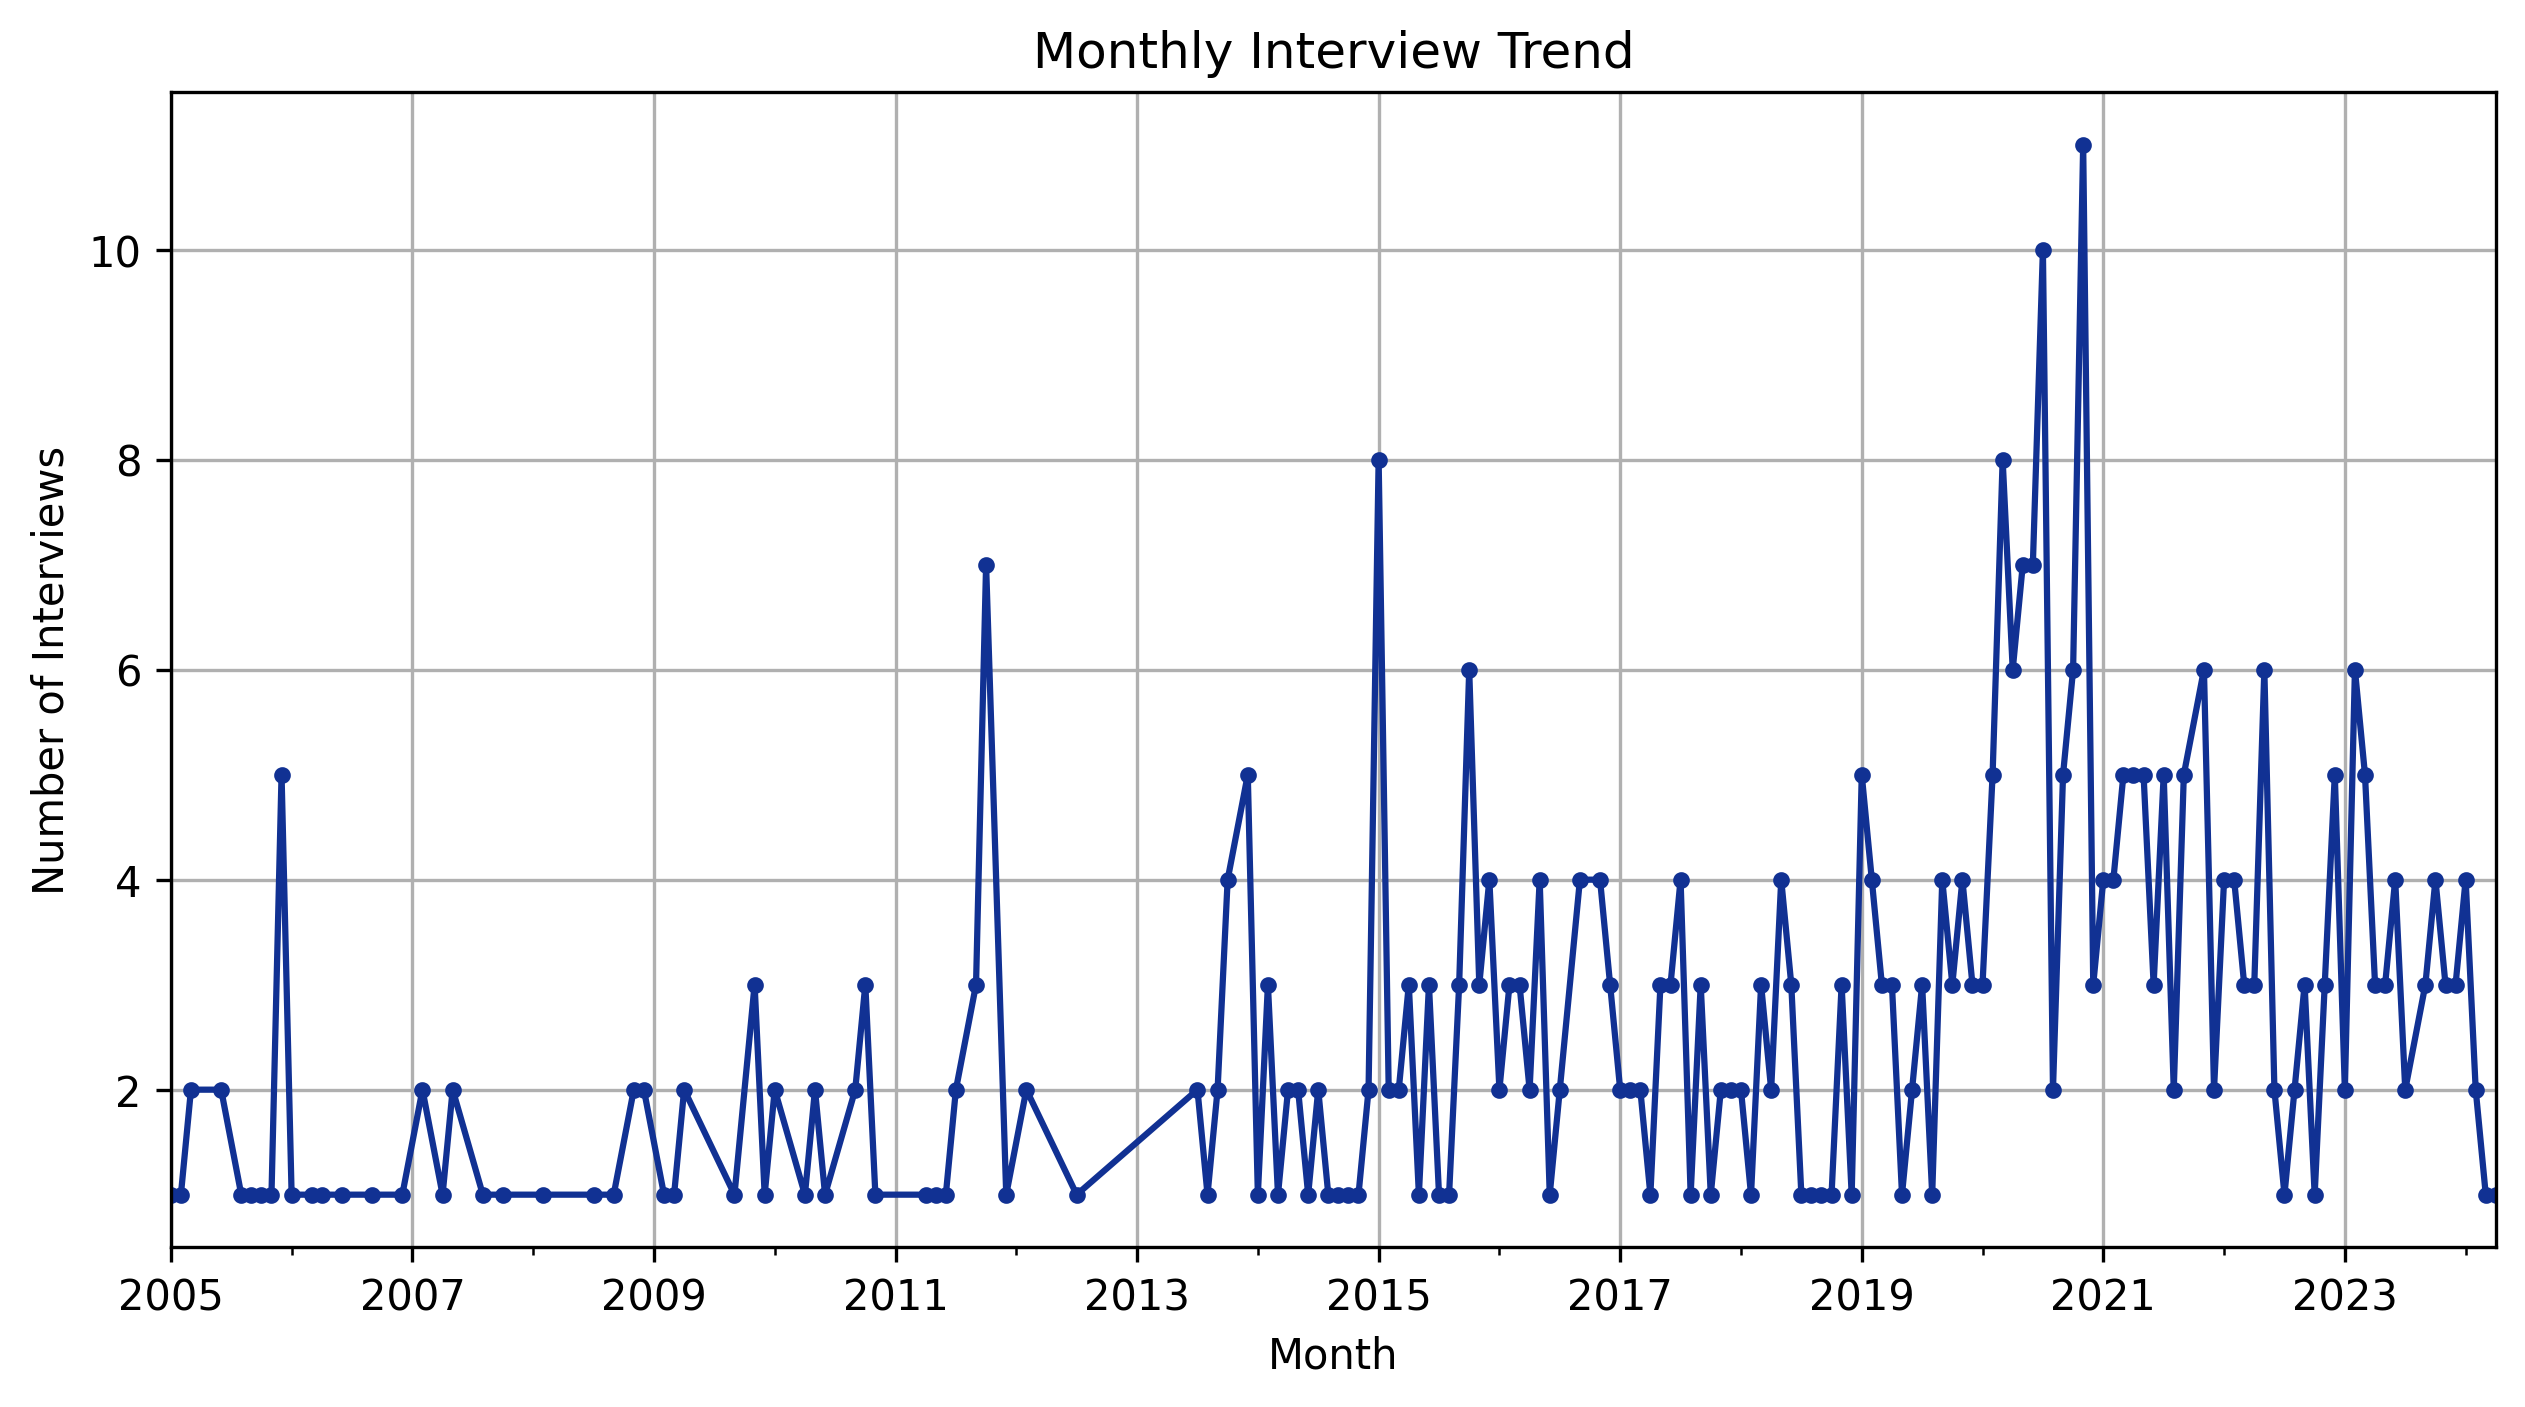

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column is in a recognizable date format, if not, convert it
#df['date'] = pd.to_datetime(df['date'])

def trend_analysis(df):
    # Group by Year-Month and count entries
    trend_data = df.groupby(df['date'].dt.to_period('M')).size()
    return trend_data

# Apply the function
monthly_trends = trend_analysis(df)

# Plotting the trend
plt.figure(figsize=(10, 5), dpi=300)
monthly_trends.plot(kind='line', marker='.', title='Monthly Interview Trend', color=color)
plt.xlabel('Month')
plt.ylabel('Number of Interviews')
plt.grid(True)
plt.show()


Adding Inflation rates 

In [46]:
!pip install ecbdata


In [47]:
from ecbdata import ecbdata

df2 = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', 
                        start='2005-01')

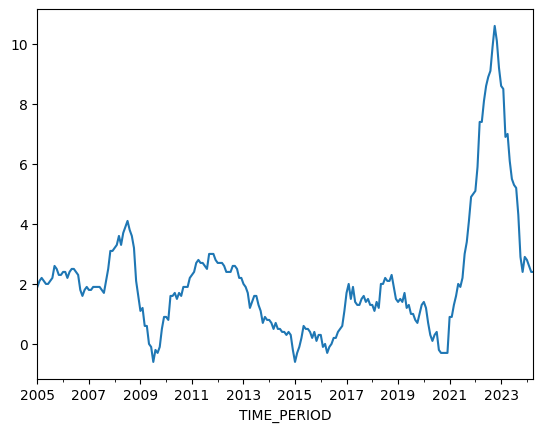

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is the DataFrame you intend to use
df2['TIME_PERIOD'] = pd.to_datetime(df2['TIME_PERIOD'])  # Convert the 'TIME_PERIOD' column to datetime
df2.set_index('TIME_PERIOD', inplace=True)  # Set 'TIME_PERIOD' as the index of df2

df2['OBS_VALUE'].plot()  # Plot the 'OBS_VALUE' column
plt.show()


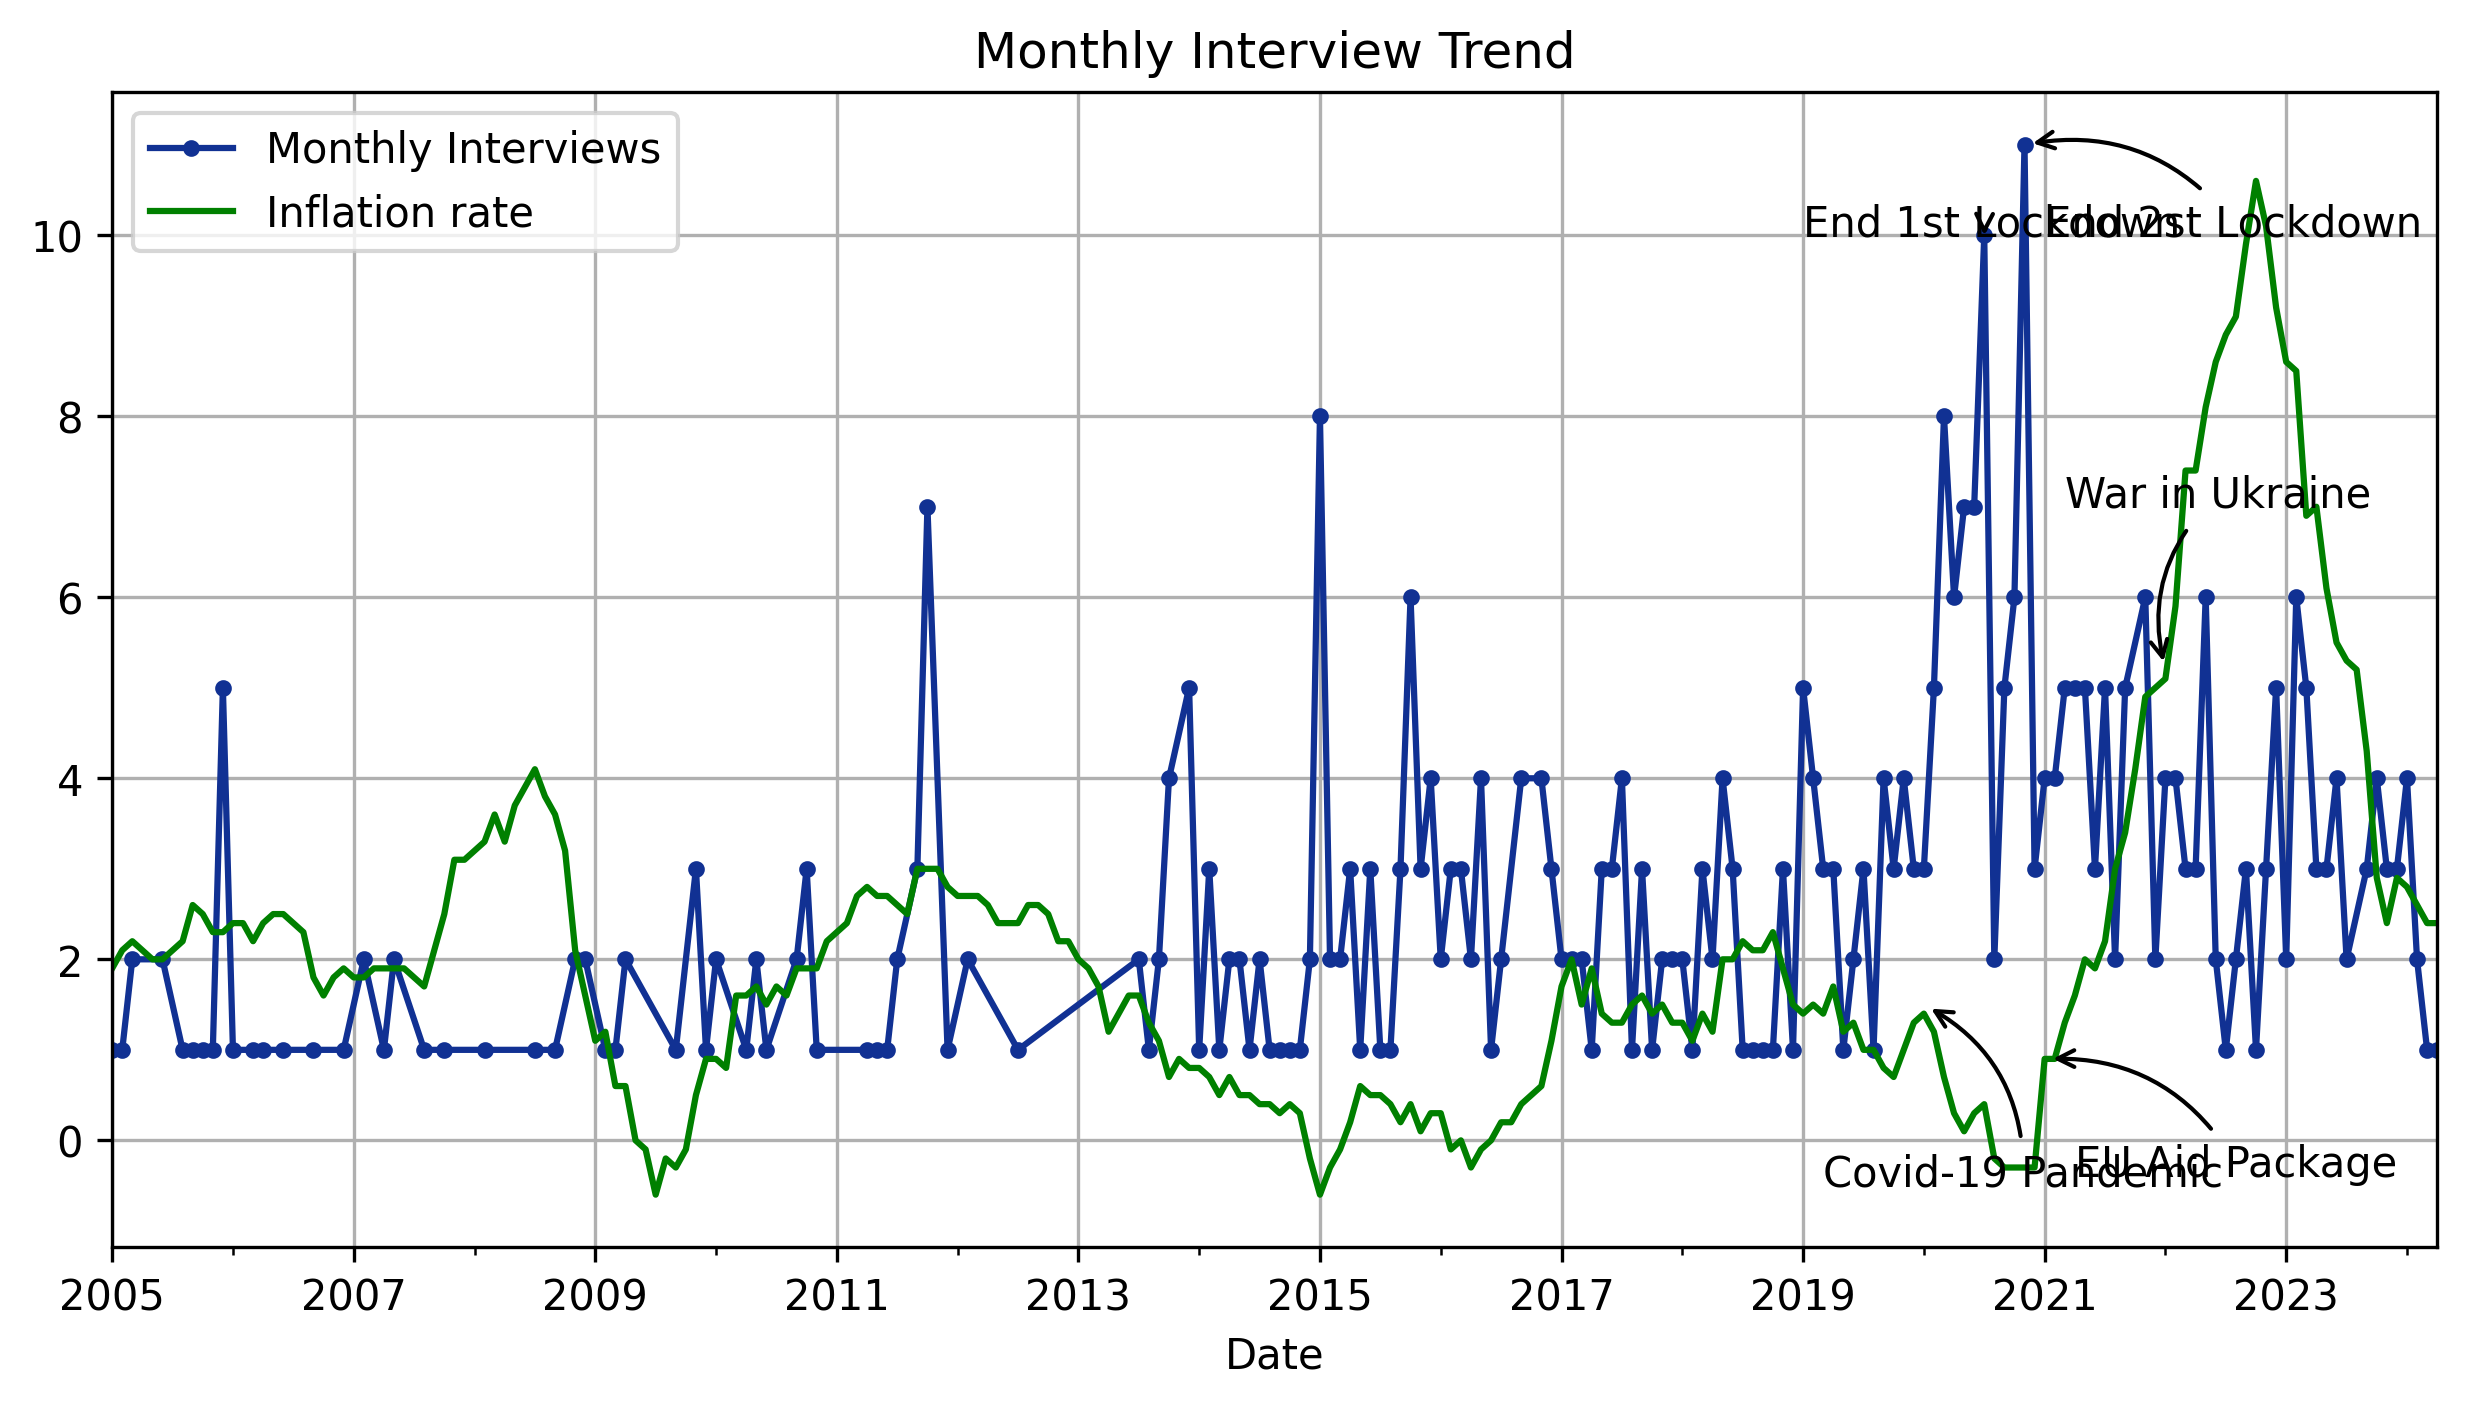

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column in first DataFrame is in a recognizable date format, if not, convert it
# df1['date'] = pd.to_datetime(df1['date'])

def trend_analysis(df):
    # Group by Year-Month and count entries
    trend_data = df.groupby(df['date'].dt.to_period('M')).size()
    return trend_data

# Apply the function on the first DataFrame
monthly_trends = trend_analysis(df)  # ensure you use df1 here if that's the intended DataFrame

# Plotting the monthly trend from the first DataFrame
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
monthly_trends.plot(kind='line', marker='.', title='Monthly Interview Trend', color=color, label='Monthly Interviews', ax=ax)  # color and label adjusted

# Assuming the second DataFrame has already the 'TIME_PERIOD' column converted to datetime
# df2.TIME_PERIOD = pd.to_datetime(df2.TIME_PERIOD)
# df2 = df2.set_index('TIME_PERIOD')

# Overlay the plot from the second DataFrame
df2['OBS_VALUE'].plot(color='green', label='Inflation rate', ax=ax)  # Using a different color and label

# Multiple Annotations
events = {
    'Covid-19 Pandemic': (pd.to_datetime('2020-01-01'), 1.5, pd.to_datetime('2019-03-01'), -0.5),
    'End 1st Lockdown': (pd.to_datetime('2020-07-01'), 10.0, pd.to_datetime('2019-01-01'), 10),
    'End 2st Lockdown': (pd.to_datetime('2020-11-01'), 11.0, pd.to_datetime('2021-01-01'), 10),
    'EU Aid Package': (pd.to_datetime('2021-01-01'), .9, pd.to_datetime('2021-04-01'), -0.4),
    'War in Ukraine': (pd.to_datetime('2022-01-01'), 5.2, pd.to_datetime('2021-03-01'), 7)

}

for label, (important_date, important_value, date_text, value_text) in events.items():
    ax.annotate(label, xy=(important_date, important_value), xytext=(date_text, value_text),
                textcoords='data', 
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.3'))

# Adding labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('')
ax.grid(True)
ax.legend()

# Show the combined plot
plt.show()


9. Keyword Extraction


In [ ]:
"""import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(df, top_n=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['contents'])
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a list to store keywords for each document
    top_keywords = []

    # Loop through each row in the TF-IDF matrix
    for row in tfidf_matrix:
        # Get the indices of the top n features for this row
        top_n_idx = np.argsort(row.toarray().flatten())[-top_n:]
        # Get the corresponding feature names
        top_features = [feature_names[i] for i in top_n_idx]
        # Add the features as a string separated by commas
        top_keywords.append(", ".join(top_features))

    # Add the keywords as a new column to the DataFrame
    df['top_keywords'] = top_keywords
    return df

# Assume df is your DataFrame and it already has a column 'contents' with text data
# Apply the function
df = extract_keywords(df)

# Display the updated DataFrame
print(df[['contents', 'top_keywords']])
"""

'import numpy as np\nimport pandas as pd\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\ndef extract_keywords(df, top_n=5):\n    vectorizer = TfidfVectorizer(stop_words=\'english\')\n    tfidf_matrix = vectorizer.fit_transform(df[\'contents\'])\n    feature_names = vectorizer.get_feature_names_out()\n    \n    # Create a list to store keywords for each document\n    top_keywords = []\n\n    # Loop through each row in the TF-IDF matrix\n    for row in tfidf_matrix:\n        # Get the indices of the top n features for this row\n        top_n_idx = np.argsort(row.toarray().flatten())[-top_n:]\n        # Get the corresponding feature names\n        top_features = [feature_names[i] for i in top_n_idx]\n        # Add the features as a string separated by commas\n        top_keywords.append(", ".join(top_features))\n\n    # Add the keywords as a new column to the DataFrame\n    df[\'top_keywords\'] = top_keywords\n    return df\n\n# Assume df is your DataFrame and it already h

10. Language Detection


In [50]:
from langdetect import detect

def detect_language(df):
    df['language'] = df['contents'].apply(detect)
    return df

# Apply the function
df = detect_language(df)



/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_53306/2172205828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['contents'].apply(detect)


In [51]:
df.head(50)

,date,Media,Member,Link,Information,Questions,contents,sentiment,pos_tags,text_length,language
0,2005-12-23,Interview with Der Spiegel,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"SPIEGEL: Monsieur Trichet, any concrete uttera...",The publication of the translation was authori...,0.137979,"[(The, DT), (publication, NN), (of, IN), (the,...",9371,en
1,2005-12-19,Interview with Hospodářské Noviny,Otmar Issing,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,The new EU member states want to adopt the eur...,These questions are all closely related to eac...,0.173579,"[(These, DT), (questions, NNS), (are, VBP), (a...",3209,en
2,2005-12-19,Interview with Financial Times and Financial T...,Lucas Papademos,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"Mr Papademos, you have responsibility as ECB V...",A comparison of the risks involved when short-...,0.084569,"[(A, DT), (comparison, NN), (of, IN), (the, DT...",16231,en
3,2005-12-15,Interview with Paris Match,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,Paris Match. After two uneventful years at the...,The publication of the translation was authori...,0.152205,"[(The, DT), (publication, NN), (of, IN), (the,...",8186,en
4,2005-12-09,Interview in Il Giornale,Lorenzo Bini Smaghi,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"However, Europe’s politicians, with few except...","By Angelo Allegri, our correspondent in Frankf...",0.094762,"[(By, IN), (Angelo, NNP), (Allegri, NNP), (our...",6765,en
5,2005-11-24,"Interview in Die Welt, La Stampa and Libération",Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,Q: You have announced that there is to be a ve...,The publication of the text was authorised by ...,0.096294,"[(The, DT), (publication, NN), (of, IN), (the,...",11076,en
6,2005-10-14,Interview with Izvestia,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,“Price stability – we owe that to the people o...,"When the rouble becomes convertible, will Russ...",0.077531,"[(When, WRB), (the, DT), (rouble, JJ), (become...",7025,en
7,2005-09-21,"Interview with the Irish Times, Le Figaro, El ...",Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,The euro zone is facing its third oil shock an...,The publication of the text was authorised by ...,0.158274,"[(The, DT), (publication, NN), (of, IN), (the,...",14124,en
8,2005-08-09,Interview with Il Sole 24 Ore,Otmar Issing,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,ECB President Trichet said back in July that t...,Is the economic slowdown in the first part of ...,0.069662,"[(Is, VBZ), (the, DT), (economic, JJ), (slowdo...",7212,en
9,2005-06-27,Interview with La Gaceta de los Negocios,José Manuel González-Páramo,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,La Gaceta: How does the crisis in Europe stemm...,English translation of an interview published ...,0.122377,"[(English, JJ), (translation, NN), (of, IN), (...",11720,en
